## KMeans Clustering of Food Nutrients

### KMeans clustering of data about food items and their nutrient contents

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("foodnutrient.csv")

In [14]:
data.head()

,Food Item,Calories,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beef steak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [13]:
data[data.isnull().sum(axis = 1) > 0]

,Food Item,Calories,Protein,Fat,Calcium,Iron


In [30]:
#remove the names and set it to rows
data.index = data['Food Item']

In [32]:
del data['Food Item']

In [33]:
data.head()

,Calories,Protein,Fat,Calcium,Iron
Food Item,,,,,
Braised beef,340,20,28,9,2.6
Hamburger,245,21,17,9,2.7
Roast beef,420,15,39,7,2.0
Beef steak,375,19,32,9,2.6
Canned beef,180,22,10,17,3.7


In [34]:
data.describe()

,Calories,Protein,Fat,Calcium,Iron
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,207.407407,19.000000,13.481481,43.962963,2.381481
std,101.207806,4.251696,11.257033,78.034254,1.461305
min,45.000000,7.000000,1.000000,5.000000,0.500000
25%,135.000000,16.500000,5.000000,9.000000,1.350000
50%,180.000000,19.000000,9.000000,9.000000,2.500000
75%,282.500000,22.000000,22.500000,31.500000,2.600000
max,420.000000,26.000000,39.000000,367.000000,6.000000


In [39]:
data.shape

(27, 5)

The scale of variables Calories and Calcium is much larger than other variables. Therefore, they may affect more when calculating the Euclidean distance. This means data should be scaled.

In [35]:
from sklearn.preprocessing import scale

In [41]:
data_scaled = pd.DataFrame(scale(data, axis = 0, copy = True))

In [42]:
data_scaled.head()

,0,1,2,3,4
0,1.335059,0.239681,1.314297,-0.456581,0.152385
1,0.378515,0.479361,0.318516,-0.456581,0.222121
2,2.140569,-0.958723,2.310078,-0.482699,-0.266028
3,1.687470,0.000000,1.676399,-0.456581,0.152385
4,-0.275962,0.719042,-0.315163,-0.352109,0.919476


In [43]:
data_scaled.index = data.index

In [44]:
data_scaled.columns = data.columns

In [46]:
data_scaled.head()

,Calories,Protein,Fat,Calcium,Iron
Food Item,,,,,
Braised beef,1.335059,0.239681,1.314297,-0.456581,0.152385
Hamburger,0.378515,0.479361,0.318516,-0.456581,0.222121
Roast beef,2.140569,-0.958723,2.310078,-0.482699,-0.266028
Beef steak,1.687470,0.000000,1.676399,-0.456581,0.152385
Canned beef,-0.275962,0.719042,-0.315163,-0.352109,0.919476


In [47]:
correlation = data_scaled.corr()
correlation

,Calories,Protein,Fat,Calcium,Iron
Calories,1.000000,0.173848,0.987067,-0.320384,-0.095389
Protein,0.173848,1.000000,0.024912,-0.085089,-0.174571
Fat,0.987067,0.024912,1.000000,-0.308132,-0.056253
Calcium,-0.320384,-0.085089,-0.308132,1.000000,0.043099
Iron,-0.095389,-0.174571,-0.056253,0.043099,1.000000


Calories and Fat is highly correlated. We would expect foods high in fats to be high in calories and also to be grouped together

In [49]:
from sklearn.cluster import KMeans

In [56]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", algorithm = "elkan").fit(data_scaled)

In [57]:
kmeans.labels_

array([2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 3, 1, 1])

In [59]:
kmeans.cluster_centers_

array([[-1.50939981, -2.39680639, -1.1298932 ,  0.44448967,  2.31418728],
       [-0.52768394,  0.27163806, -0.58673979, -0.06481133, -0.34971089],
       [ 1.24555785,  0.        ,  1.27406355, -0.45948334,  0.05940436],
       [-0.27596192,  0.71904192, -0.40568866,  4.21854072,  0.08264955]])

In [61]:
kmeans.inertia_

43.8852559796518

In [70]:
#calculate sum of squared errors for different values of k
tss= []
for k in range(2,9):
    kmeans = KMeans(n_clusters = k, init = "k-means++", algorithm = "elkan")
    kmeans.fit(data_scaled)
    tss.append(kmeans.inertia_)

In [71]:
tss

[89.24436770008961,
 61.538712936940485,
 42.400372873132625,
 29.22823867390757,
 23.092930054800867,
 17.2591723549794,
 12.72217380442327]

In [69]:
from matplotlib import pyplot as plt

Text(0,0.5,'Within sum of squared distance')

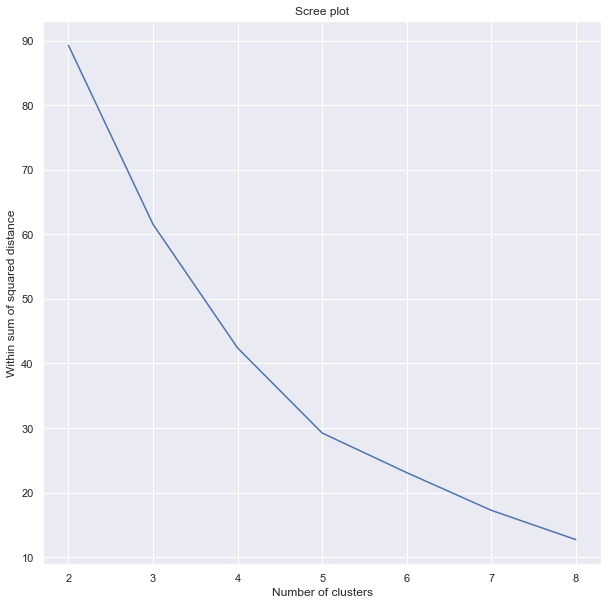

In [76]:
fig = plt.figure(figsize=(10,10))
plt.plot(range(2,9), tss)
plt.grid(True)
plt.title('Scree plot')
plt.xlabel('Number of clusters')
plt.ylabel('Within sum of squared distance')

From the skree plot, the elbow is seen at k = 5. Hence optimal number of clusters = 5

In [77]:
#forming 5 clusters and interpreting results

In [92]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", algorithm = "elkan")
clusters = kmeans.fit(data_scaled)

In [93]:
#append cluster information to original data
data['cluster'] = clusters.labels_

In [94]:
#a look at original data
data.describe()

,Calories,Protein,Fat,Calcium,Iron,cluster
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,207.407407,19.000000,13.481481,43.962963,2.381481,1.814815
std,101.207806,4.251696,11.257033,78.034254,1.461305,1.359780
min,45.000000,7.000000,1.000000,5.000000,0.500000,0.000000
25%,135.000000,16.500000,5.000000,9.000000,1.350000,0.000000
50%,180.000000,19.000000,9.000000,9.000000,2.500000,2.000000
75%,282.500000,22.000000,22.500000,31.500000,2.600000,3.000000
max,420.000000,26.000000,39.000000,367.000000,6.000000,4.000000


In [95]:
#cluster1
data.loc[data['cluster'] == 1]

,Calories,Protein,Fat,Calcium,Iron,cluster
Food Item,,,,,,
Canned sardines,180,22,9,367,2.5,1


## Cluster 1 has very high calcium

In [96]:
#cluster2
data.loc[data['cluster'] == 2]

,Calories,Protein,Fat,Calcium,Iron,cluster
Food Item,,,,,,
Broiled chicken,115,20,3,8,1.4,2
Baked bluefish,135,22,4,25,0.6,2
Canned crabmeat,90,14,2,38,0.8,2
Fried haddock,135,16,5,15,0.5,2
Broiled mackerel,200,19,13,5,1.0,2
Canned mackerel,155,16,9,157,1.8,2
Fried perch,195,16,11,14,1.3,2
Canned salmon,120,17,5,159,0.7,2


## Cluster 2 contains low calorie, low iron, medium calcium but high protein foods. A cluster of lean- meat

In [97]:
#cluster3
data.loc[data['cluster'] == 3]

,Calories,Protein,Fat,Calcium,Iron,cluster
Food Item,,,,,,
Braised beef,340,20,28,9,2.6,3
Roast beef,420,15,39,7,2.0,3
Beef steak,375,19,32,9,2.6,3
Roast lamb leg,265,20,20,9,2.6,3
Roast lamb shoulder,300,18,25,9,2.3,3
Smoked ham,340,20,28,9,2.5,3
Roast pork,340,19,29,9,2.5,3
Simmered pork,355,19,30,9,2.4,3


## Cluster 3 is high calorie, low calcium, high iron and high protein foods. Healthy food group

In [98]:
#cluster4
data.loc[data['cluster'] == 4]

,Calories,Protein,Fat,Calcium,Iron,cluster
Food Item,,,,,,
Raw clams,70,11,1,82,6.0,4
Canned clams,45,7,1,74,5.4,4


## cluster 4 is low calorie, low fat, medium protein, high calcium, high iron food.

In [99]:
#cluster5
data.loc[data['cluster'] == 5]

,Calories,Protein,Fat,Calcium,Iron,cluster
Food Item,,,,,,
